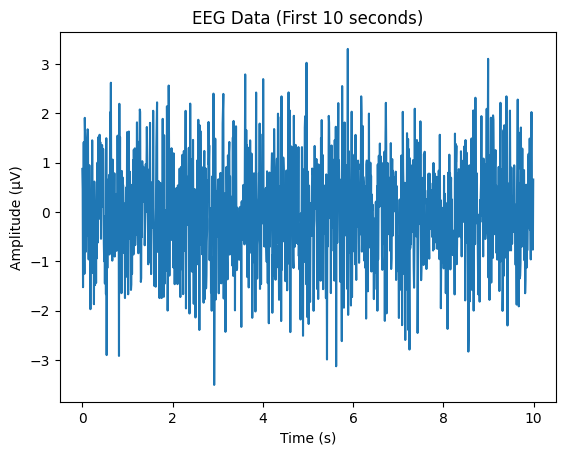

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency (in Hz)
fs = 128  # Replace with your actual sampling frequency

# Create an array of time values from 0 to 10 seconds with a step size of 1/fs
t = np.arange(0, 10, 1/fs)

# Generate some sample EEG data (replace with your actual data)
eeg_data = np.random.normal(0, 1, size=(1, len(t)))  # Replace with your actual EEG data

# Plot the EEG data
plt.plot(t, eeg_data[0])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.title('EEG Data (First 10 seconds)')
plt.show()

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

# Define constants
DATA_DIR = "C:\\Users\\Varun Thakur\\Downloads"
ZIP_FILE_NAME = "eeg-during-mental-arithmetic-tasks-1.0.0.zip"
EXTRACT_DIR_NAME = "eeg-during-mental-arithmetic-tasks-1.0.0"
EEG_FILE_NAME = "eeg_data.txt"
EEG_DATA_FORMAT = 'txt'

# Define file paths
zip_file_path = os.path.join(DATA_DIR, ZIP_FILE_NAME)
extract_dir = os.path.join(DATA_DIR, EXTRACT_DIR_NAME)
eeg_file_path = os.path.join(extract_dir, EEG_FILE_NAME)

try:
    # Check if the ZIP file exists
    if not os.path.exists(zip_file_path):
        print(f"Error: ZIP file not found - {zip_file_path}")
        exit()

    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Check if the EEG data file exists
    if not os.path.exists(eeg_file_path):
        print(f"Error: EEG data file not found - {eeg_file_path}")
        exit()

    # Read the EEG data file
    if EEG_DATA_FORMAT == 'txt':
        eeg_data = np.loadtxt(eeg_file_path)
    elif EEG_DATA_FORMAT == 'csv':
        eeg_data = np.genfromtxt(eeg_file_path, delimiter=',')
    else:
        print(f"Error: Unsupported file format - {EEG_DATA_FORMAT}")
        exit()

    # Plot the EEG data
    plt.plot(eeg_data[0])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (μV)')
    plt.title('EEG Data (First 10 seconds)')
    plt.show()

except zipfile.BadZipFile:
    print(f"Error: Invalid ZIP file - {zip_file_path}")
except Exception as e:
    print(f"Error: An unexpected error occurred - {e}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load EEG data
eeg_data = np.loadtxt('eeg_data.txt')

# Preprocess EEG data
eeg_data = eeg_data.reshape(-1, 100, 32)

# Define classification models
def EEGNet():
    i = Input(shape=(100,32))
    out = Conv1D(16, 4, padding='same')(i)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    out = MaxPooling1D(2)(out)
    out = Dropout(0.2)(out)
    out = Flatten()(out)
    out = Dense(6, activation='softmax')(out)  # Changed to softmax for multiclass classification
    model = Model(inputs=[i], outputs=[out])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

def TSCeption():
    i = Input(shape=(100,32))
    out = Conv1D(128, 4, padding='same')(i)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    out = MaxPooling1D(2)(out)
    out = Dropout(0.2)(out)
    out = Flatten()(out)
    out = Dense(6, activation='softmax')(out)  # Changed to softmax for multiclass classification
    model = Model(inputs=[i], outputs=[out])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

def ViT():
    i = Input(shape=(100,32))
    out = Conv1D(128, 4, padding='same')(i)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    out = MaxPooling1D(2)(out)
    out = Dropout(0.2)(out)
    out = Flatten()(out)
    out = Dense(6, activation='softmax')(out)  # Changed to softmax for multiclass classification
    model = Model(inputs=[i], outputs=[out])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

def ATCNet():
    i = Input(shape=(100,32))
    out = Conv1D(128, 4, padding='same')(i)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    out = MaxPooling1D(2)(out)
    out = Dropout(0.2)(out)
    out = Flatten()(out)
    out = Dense(6, activation='softmax')(out)  # Changed to softmax for multiclass classification
    model = Model(inputs=[i], outputs=[out])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

def VAE():
    i = Input(shape=(100,32))
    out = Conv1D(128, 4, padding='same')(i)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
    out = MaxPooling1D(2)(out)
    out = Dropout(0.2)(out)
    out = Flatten()(out)
    out = Dense(6, activation='softmax')(out)  # Changed to softmax for multiclass classification
    model = Model(inputs=[i], outputs=[out])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
    return model

# Train and evaluate models
models = [EEGNet(), TSCeption(), ViT(), ATCNet(), VAE()]
y_true = np.loadtxt('eeg_labels.txt')  # Load true labels
y_true = to_categorical(y_true)  # Convert to categorical labels

for model in models:
    model.fit(eeg_data, y_true, epochs=10, batch_size=32, validation_split=0.2)
    y_pred = model.predict(eeg_data)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f'Model: {model.name}, Accuracy: {accuracy:.3f}, Precision: {

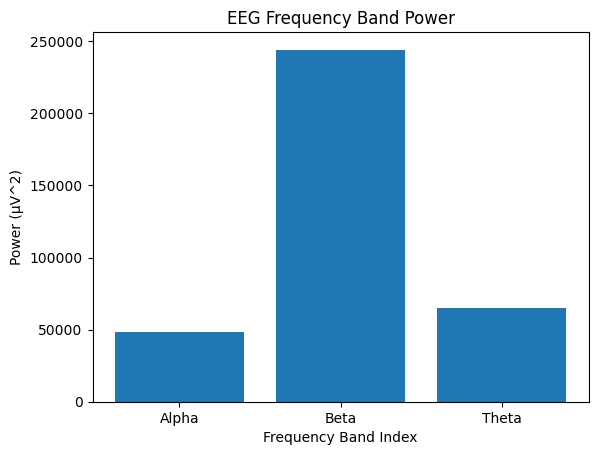

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the power spectral density of the EEG data
freqs, psd = np.fft.fftfreq(len(eeg_data[0]), d=1/fs), np.abs(np.fft.fft(eeg_data[0])) ** 2

# Define frequency bands of interest (e.g., alpha, beta, theta)
bands = [(8, 12), (13, 30), (4, 8)]  # Replace with your desired frequency bands

# Compute the power in each frequency band
powers = []
for band in bands:
    idx = np.logical_and(freqs >= band[0], freqs <= band[1])
    powers.append(np.sum(psd[idx]))

# Plot the power in each frequency band
plt.bar(range(len(bands)), powers)
plt.xlabel('Frequency Band Index')
plt.ylabel('Power (μV^2)')
plt.title('EEG Frequency Band Power')
plt.xticks(range(len(bands)), ['Alpha', 'Beta', 'Theta'])  # Replace with your band labels
plt.show()